- Read in and conduct minor clean up on Income by County, Gyms by County and Population by County
- Merge above dataframes into one dataframe
- Analysis and business rules established

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
income_by_county = pd.read_csv('/Users/jennihawk/Desktop/Business Course/Data For Project/Bureau of Economic Data Personal Income by County/incomebycounty_fnlcleanUPDATE.csv')

In [4]:
import matplotlib.pyplot as plt

### Income by County

In [5]:
#rename personal income column so no spaces
income_by_county.rename(columns = {'Personal Income':'Income'}, inplace = True)

In [6]:
#income_by_county['Income'] = income_by_county['Income'].str.replace(',', '').astype(int)

In [7]:
income_by_county['Income'] = income_by_county['Income'].str.replace(',', '')

In [8]:
#remove Valdez-Cordova Census Area2 it has '(NA)' value
income_by_county.drop(index = 94, inplace = True)

In [9]:
#change 'Income' to integer
income_by_county['Income'] = income_by_county['Income'].astype(int)

In [10]:
income_by_county.head()

,State,County,Income,Index
0,Alabama,Autauga,46814,AlabamaAutauga
1,Alabama,Baldwin,50953,AlabamaBaldwin
2,Alabama,Barbour,37850,AlabamaBarbour
3,Alabama,Bibb,34300,AlabamaBibb
4,Alabama,Blount,38808,AlabamaBlount


In [11]:
income_by_county.Index.unique()

array(['AlabamaAutauga', 'AlabamaBaldwin', 'AlabamaBarbour', ...,
       'WyomingUinta', 'WyomingWashakie', 'WyomingWeston'], dtype=object)

In [12]:
income_by_county.Index = income_by_county.Index.str.strip()

#### Counties Median Income > 67,500

In [16]:
greater_than_median = income_by_county[income_by_county['Income'] > 67500]
greater_than_median.head()

,State,County,Income,Index
69,Alaska,Anchorage Municipality,70477,AlaskaAnchorage Municipality
71,Alaska,Bristol Bay Borough,152678,AlaskaBristol Bay Borough
72,Alaska,Chugach Census Area2,69369,AlaskaChugach Census Area2
74,Alaska,Denali Borough,72967,AlaskaDenali Borough
79,Alaska,Juneau City and Borough,74162,AlaskaJuneau City and Borough


#### Counties >$67,500

In [17]:
greater_than_median['County'].nunique()

186

#### States that represent greater than median

In [18]:
greater_than_median['State'].nunique()

42

### Gyms by County

In [19]:
gym_by_county = pd.read_csv('/Users/jennihawk/Desktop/Business Course/Data For Project/County Business Patterns/gyms_by_county/Total gyms_recs by County/gym_by_county_formatted.csv')
gym_by_county

,GEOGRAPHY,ESTABS,COUNTY,STATE,Index
0,"Autauga County, Alabama",9,Autauga,Alabama,AlabamaAutauga
1,"Baldwin County, Alabama",22,Baldwin,Alabama,AlabamaBaldwin
2,"Blount County, Alabama",4,Blount,Alabama,AlabamaBlount
3,"Calhoun County, Alabama",6,Calhoun,Alabama,AlabamaCalhoun
4,"Chilton County, Alabama",4,Chilton,Alabama,AlabamaChilton
5,"Colbert County, Alabama",8,Colbert,Alabama,AlabamaColbert
6,"Covington County, Alabama",4,Covington,Alabama,AlabamaCovington
7,"Cullman County, Alabama",4,Cullman,Alabama,AlabamaCullman
8,"DeKalb County, Alabama",3,DeKalb,Alabama,AlabamaDeKalb
9,"Elmore County, Alabama",5,Elmore,Alabama,AlabamaElmore


In [20]:
gym_by_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GEOGRAPHY  1305 non-null   object
 1   ESTABS     1305 non-null   object
 2   COUNTY     1305 non-null   object
 3   STATE      1305 non-null   object
 4   Index      1305 non-null   object
dtypes: object(5)
memory usage: 51.1+ KB


In [21]:
gym_by_county.Index.unique()

array([' AlabamaAutauga ', ' AlabamaBaldwin ', ' AlabamaBlount ', ...,
       ' Puerto RicoPonce Municipio', ' Puerto RicoSan Juan Municipio',
       ' United States Virgin IslandsSt. Thomas Island'], dtype=object)

In [22]:
gym_by_county.Index = gym_by_county.Index.str.strip()

In [23]:
gym_by_county.Index.unique()

array(['AlabamaAutauga', 'AlabamaBaldwin', 'AlabamaBlount', ...,
       'Puerto RicoPonce Municipio', 'Puerto RicoSan Juan Municipio',
       'United States Virgin IslandsSt. Thomas Island'], dtype=object)

In [24]:
gym_by_county['ESTABS'] = gym_by_county['ESTABS'].str.replace(',', '')

In [25]:
gym_by_county['ESTABS'] = gym_by_county['ESTABS'].astype(int)

In [26]:
gym_by_county.drop(['GEOGRAPHY','COUNTY', 'STATE'], axis=1, inplace=True)

In [27]:
#drop puerto rico, guam other
gym_by_county = gym_by_county.iloc[:1294]

In [28]:
gym_by_county.head()

,ESTABS,Index
0,9,AlabamaAutauga
1,22,AlabamaBaldwin
2,4,AlabamaBlount
3,6,AlabamaCalhoun
4,4,AlabamaChilton


### Combine gyms dataframe with income by county

In [29]:
#pandas will automatically detect same column in this case 'Index'
income_gyms = pd.merge(income_by_county, gym_by_county, how='left')

In [30]:
income_gyms.head()

,State,County,Income,Index,ESTABS
0,Alabama,Autauga,46814,AlabamaAutauga,9.0
1,Alabama,Baldwin,50953,AlabamaBaldwin,22.0
2,Alabama,Barbour,37850,AlabamaBarbour,NaN
3,Alabama,Bibb,34300,AlabamaBibb,NaN
4,Alabama,Blount,38808,AlabamaBlount,4.0


In [31]:
#alt: tell pandas explicitly what columns to use from second dataframe
#alt_code = pd.merge(income_by_county,gym_by_county[['ESTABS','Index']], how='left',on='Index')

In [32]:
#replace NaN 'ESTAB' with zero
income_gyms['ESTABS'] = income_gyms['ESTABS'].fillna(0)

In [33]:
income_gyms.head()

,State,County,Income,Index,ESTABS
0,Alabama,Autauga,46814,AlabamaAutauga,9.0
1,Alabama,Baldwin,50953,AlabamaBaldwin,22.0
2,Alabama,Barbour,37850,AlabamaBarbour,0.0
3,Alabama,Bibb,34300,AlabamaBibb,0.0
4,Alabama,Blount,38808,AlabamaBlount,4.0


In [34]:
income_gyms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 3116
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   3117 non-null   object 
 1   County  3117 non-null   object 
 2   Income  3117 non-null   int64  
 3   Index   3117 non-null   object 
 4   ESTABS  3117 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 146.1+ KB


In [35]:
income_gyms['ESTABS'] = income_gyms['ESTABS'].astype('int')

In [36]:
income_gyms.head()

,State,County,Income,Index,ESTABS
0,Alabama,Autauga,46814,AlabamaAutauga,9
1,Alabama,Baldwin,50953,AlabamaBaldwin,22
2,Alabama,Barbour,37850,AlabamaBarbour,0
3,Alabama,Bibb,34300,AlabamaBibb,0
4,Alabama,Blount,38808,AlabamaBlount,4


### Population by County

In [37]:
pop_by_county = pd.read_csv('/Users/jennihawk/Desktop/Business Course/Data For Project/Population_By_County/county_pop_formatted.csv')

In [38]:
pop_by_county.rename(columns = {'2020 POP':'POPULATION'}, inplace = True)

In [39]:
pop_by_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STNAME      3194 non-null   object
 1   COUNTY      3194 non-null   object
 2   POPULATION  3194 non-null   int64 
 3   Index       3194 non-null   object
dtypes: int64(1), object(3)
memory usage: 99.9+ KB


In [40]:
pop_by_county.head()

,STNAME,COUNTY,POPULATION,Index
0,Alabama,Alabama,5024279,AlabamaAlabama
1,Alabama,Autauga,58805,AlabamaAutauga
2,Alabama,Baldwin,231767,AlabamaBaldwin
3,Alabama,Barbour,25223,AlabamaBarbour
4,Alabama,Bibb,22293,AlabamaBibb


In [41]:
pop_by_county['Index'] = pop_by_county['Index'].str.replace('Parish', '')

In [42]:
pop_by_county.head()

,STNAME,COUNTY,POPULATION,Index
0,Alabama,Alabama,5024279,AlabamaAlabama
1,Alabama,Autauga,58805,AlabamaAutauga
2,Alabama,Baldwin,231767,AlabamaBaldwin
3,Alabama,Barbour,25223,AlabamaBarbour
4,Alabama,Bibb,22293,AlabamaBibb


In [43]:
pop_by_county.Index.unique()

array(['AlabamaAlabama', 'AlabamaAutauga ', 'AlabamaBaldwin ', ...,
       'WyomingUinta ', 'WyomingWashakie ', 'WyomingWeston '],
      dtype=object)

In [44]:
pop_by_county.Index = pop_by_county.Index.str.strip()

In [45]:
#change values in index column to match index column of df being merged with 
pop_by_county.at[74,'Index']='AlaskaChugach Census Area2'

In [46]:
pop_by_county.at[75,'Index']='AlaskaCopper River Census Area2'

In [47]:
#change values in index column to match index column of df being merged with 
pop_by_county.at[756,'Index']='IndianaLagrange'

In [48]:
#change values in index column to match index column of df being merged with 
pop_by_county.at[586,'Index']='IdahoFremont (includes Yellowstone National Park)'

In [49]:
#change values in index column to match index column of df being merged with 
pop_by_county.at[561,'Index']='HawaiiMaui + Kalawao'

In [50]:
#change values in index column to match index column of df being merged with 
pop_by_county.at[1217,'Index']='MarylandBaltimore'

In [51]:
#change values in index column to match index column of df being merged with 
pop_by_county.at[1605,'Index']='MissouriSt. Louis City'

In [52]:
pop_by_county.head()

,STNAME,COUNTY,POPULATION,Index
0,Alabama,Alabama,5024279,AlabamaAlabama
1,Alabama,Autauga,58805,AlabamaAutauga
2,Alabama,Baldwin,231767,AlabamaBaldwin
3,Alabama,Barbour,25223,AlabamaBarbour
4,Alabama,Bibb,22293,AlabamaBibb


In [53]:
pop_by_county.drop(['STNAME','COUNTY'], axis=1, inplace=True)

###  Population + Income  + Gym Dataframe

In [54]:
inc_gym_pop = pd.merge(income_gyms, pop_by_county, how='left')

In [55]:
inc_gym_pop.head()

,State,County,Income,Index,ESTABS,POPULATION
0,Alabama,Autauga,46814,AlabamaAutauga,9,58805.0
1,Alabama,Baldwin,50953,AlabamaBaldwin,22,231767.0
2,Alabama,Barbour,37850,AlabamaBarbour,0,25223.0
3,Alabama,Bibb,34300,AlabamaBibb,0,22293.0
4,Alabama,Blount,38808,AlabamaBlount,4,59134.0


### Check for NaN

In [56]:
check_for_nan = inc_gym_pop['POPULATION'].isnull().values.any()
print (check_for_nan)

True


### Show rows with NaN

In [57]:
inc_gym_pop[inc_gym_pop.isnull().any(axis=1)]

,State,County,Income,Index,ESTABS,POPULATION
1230,Maryland,Baltimore City,54097,MarylandBaltimore City,0,NaN
1597,Missouri,St. Louis,78804,MissouriSt. Louis,168,NaN


In [58]:
#resolve NaN rows, duplicates with different spellings
inc_gym_pop.drop([1230,1597],inplace=True)

In [59]:
#inc_gym_pop.info()

In [60]:
inc_gym_pop['POPULATION'] = inc_gym_pop['POPULATION'].astype(int)

In [61]:
inc_gym_pop.head()

,State,County,Income,Index,ESTABS,POPULATION
0,Alabama,Autauga,46814,AlabamaAutauga,9,58805
1,Alabama,Baldwin,50953,AlabamaBaldwin,22,231767
2,Alabama,Barbour,37850,AlabamaBarbour,0,25223
3,Alabama,Bibb,34300,AlabamaBibb,0,22293
4,Alabama,Blount,38808,AlabamaBlount,4,59134


In [62]:
#inc_gym_pop.to_csv('inc_gym_pop.csv', index=False)

#### Median County Population

### ANALYSIS

#### Number of Gyms Per 1000 People

In [63]:
inc_gym_pop['Gyms_Per_1000'] = inc_gym_pop['ESTABS'] / inc_gym_pop['POPULATION'] * (1000)
inc_gym_pop.head()

,State,County,Income,Index,ESTABS,POPULATION,Gyms_Per_1000
0,Alabama,Autauga,46814,AlabamaAutauga,9,58805,0.153048
1,Alabama,Baldwin,50953,AlabamaBaldwin,22,231767,0.094923
2,Alabama,Barbour,37850,AlabamaBarbour,0,25223,0.000000
3,Alabama,Bibb,34300,AlabamaBibb,0,22293,0.000000
4,Alabama,Blount,38808,AlabamaBlount,4,59134,0.067643


In [64]:
inc_gym_pop['Gyms_Per_1000'].max()

0.6000600060006

#### Further Dimensionalize Data

#### First Explored Assigning rules by percentage of distribution but the scales were too disproportionate and became very complicated

In [65]:
#percentage makeup of the column
inc_gym_pop['Gyms_Percent'] = (inc_gym_pop['Gyms_Per_1000'] / 
                  inc_gym_pop['Gyms_Per_1000'].sum()) * 100

In [66]:
#percentage makeup of the column
inc_gym_pop['Pop_Percent'] = (inc_gym_pop['POPULATION'] / 
                  inc_gym_pop['POPULATION'].sum()) * 100

In [67]:
#inc_gym_pop.head()

#### Filter >67500 Income  

In [68]:
greater_than_median2 = inc_gym_pop[inc_gym_pop['Income'] > 67500]
greater_than_median2.head()

,State,County,Income,Index,ESTABS,POPULATION,Gyms_Per_1000,Gyms_Percent,Pop_Percent
69,Alaska,Anchorage Municipality,70477,AlaskaAnchorage Municipality,41,291247,0.140774,0.096693,0.049196
71,Alaska,Bristol Bay Borough,152678,AlaskaBristol Bay Borough,0,844,0.000000,0.000000,0.000143
72,Alaska,Chugach Census Area2,69369,AlaskaChugach Census Area2,0,7102,0.000000,0.000000,0.001200
74,Alaska,Denali Borough,72967,AlaskaDenali Borough,0,1619,0.000000,0.000000,0.000273
79,Alaska,Juneau City and Borough,74162,AlaskaJuneau City and Borough,4,32255,0.124012,0.085179,0.005448


### Business Rules Dataframe: Filter >67500 Income and >= 0.2 Gyms_Per_1000 and Pop >30000

In [69]:
bizrules = inc_gym_pop[(inc_gym_pop['Income'] > 67500) & (inc_gym_pop['Gyms_Per_1000'] >= 0.2) & (inc_gym_pop['POPULATION'] > 30000)]
bizrules.head()

,State,County,Income,Index,ESTABS,POPULATION,Gyms_Per_1000,Gyms_Percent,Pop_Percent
208,California,Marin,145575,CaliforniaMarin,85,262321,0.324030,0.222565,0.044310
215,California,Napa,82408,CaliforniaNapa,28,138019,0.202871,0.139345,0.023314
225,California,San Francisco,144818,CaliforniaSan Francisco,176,873965,0.201381,0.138322,0.147626
252,Colorado,Boulder,79649,ColoradoBoulder,80,330758,0.241869,0.166131,0.055870
262,Colorado,Denver,85411,ColoradoDenver,170,715522,0.237589,0.163192,0.120863


In [70]:
#remove duplicate new york
bizrules.drop([1853], axis=0, inplace=True)

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_48166/760972843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bizrules.drop([1853], axis=0, inplace=True)


In [71]:
#bizrules.to_csv('bizrules_output.csv', index=False)

In [72]:
bizrules['County'].nunique()

38

In [73]:
bizrules['Index'].nunique()

40

In [74]:
bizrules['State'].nunique()

20

In [75]:
bizrules['POPULATION'].median()

345361.0

In [76]:
#counties by state
n_by_state = bizrules.groupby("State")["Index"].count()
#n_by_state

In [77]:
state_counts = n_by_state.to_frame()

In [78]:
state_counts.rename(columns = {'Index':'Count'}, inplace = True)

In [79]:
state_counts.sort_values(by=['Count'], axis=0, ascending=False, inplace=True)
state_counts

,Count
State,
New Jersey,5
Massachusetts,4
California,3
Georgia,3
Colorado,3
Virginia,2
Rhode Island,2
New York,2
New Hampshire,2


In [80]:
# county_by_state = bizrules.groupby(['State', 'Index']).size().reset_index(name='Count')
# county_by_state

<AxesSubplot:>

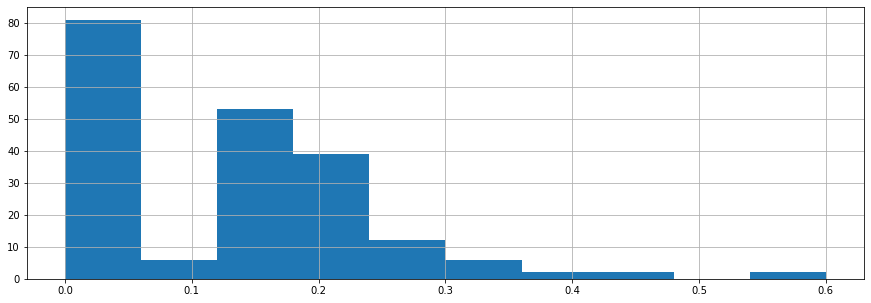

In [81]:
#gyms per 1000 people + income 67500+
look = greater_than_median2['Gyms_Per_1000'].hist(figsize=(15,5))
look

<AxesSubplot:xlabel='Income', ylabel='Gyms_Per_1000'>

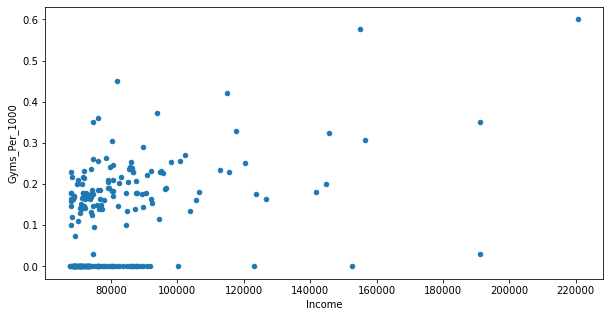

In [82]:
# plt.scatter(price, sales_per_day)
# plt.show()
#chart = plt.scatter(greater_than_median2['Income'], greater_than_median2['Gyms_Per_1000'])
greater_than_median2.plot.scatter(x='Income', y='Gyms_Per_1000', figsize=(10, 5))

#### Which Counties have > 67500 income AND =>1 establishment?

In [83]:
filter1 = income_gyms[(income_gyms['ESTABS'] >= 1) & (income_gyms['Income'] >= 67500)]
filter1.head()

,State,County,Income,Index,ESTABS
69,Alaska,Anchorage Municipality,70477,AlaskaAnchorage Municipality,41
79,Alaska,Juneau City and Borough,74162,AlaskaJuneau City and Borough,4
115,Arkansas,Benton,94289,ArkansasBenton,33
187,California,Alameda,87078,CaliforniaAlameda,233
193,California,Contra Costa,92264,CaliforniaContra Costa,179


#### Analysis: # of Counties, # of States > 67500 AND =>1 establishment

In [84]:
filter1['Index'].nunique()

121